In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def get_dataset(casename, day=None, static_casename=None):

    if static_casename is None:
        static_casename = casename
    daystr = "" if day is None else f"_{day:02}"
    mom6_hist = f"/glade/scratch/mlevy/{casename}/run/{casename}.mom6.hm_bgc_monthly_z_0001_01{daystr}.nc"
    mom6_static = f"/glade/scratch/mlevy/{static_casename}/run/{static_casename}.mom6.static.nc"

    ds_static = xr.open_dataset(mom6_static, decode_times=False)
    ds = xr.open_dataset(mom6_hist, decode_times=False).isel(time=0)
    dz = (ds["volcello"]/ds_static["area_t"])
    depth = dz.cumsum(dim="zl")
    dz.attrs["long_name"] = "Layer thickness"
    dz.attrs["units"] = "m"
    depth.attrs["long_name"] = "Layer depth"
    depth.attrs["units"] = "m"
    ds["dz"] = dz
    ds["true_depth"] = depth
    if "BOT_FLUX_TO_TEND" in ds:
        ds["bot_flux_times_dz"] = ds["BOT_FLUX_TO_TEND"] * ds["dz"]
        ds["bot_flux_times_dz"].attrs["units"] = "unitless"
        ds["bot_flux_times_dz"].attrs["long_name"] = "Product of BOT_FLUX_TO_TEND and dz"

    try:
        ds = ds.isel(zi=slice(1,None))
    except:
        pass
    
    return ds

In [3]:
def vert_plot(ds, var_to_plot, xh, yh, logx=False):
    if isinstance(ds, list):
        for ds_loc in ds:
            x = ds_loc.isel(xh=xh, yh=yh)[var_to_plot]
            y = ds_loc.isel(xh=xh, yh=yh)["true_depth"]
            plt.xlabel(f"{x.attrs['long_name']} [{x.attrs['units']}]")
            plt.plot(x, y, '-o', )
    else:
        x = ds.isel(xh=xh, yh=yh)[var_to_plot]
        y = ds.isel(xh=xh, yh=yh)["true_depth"]
        plt.xlabel(f"{x.attrs['long_name']} [{x.attrs['units']}]")
        plt.plot(x, y, '-o', )
    plt.gca().invert_yaxis()
    plt.ylabel("depth [m]")
    if logx:
        plt.xscale("log")

### Monthly comparisons

`080` was with `MIX_BOUNDARY_TRACER_ALE = False`, `085` uses `MIX_BOUNDARY_TRACER_ALE = True`

In [4]:
casename = "C1850MOMECO.080"

ds_080 = get_dataset(casename)

In [5]:
casename = "C1850MOMECO.085"

ds_085 = get_dataset(casename)

In [6]:
xh = 79
yh = 323

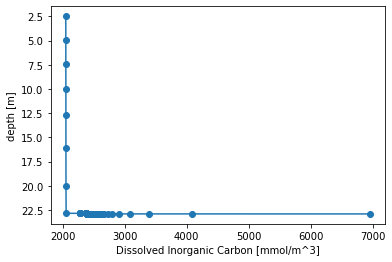

In [7]:
vert_plot(ds_080, "DIC", xh=xh, yh=yh)

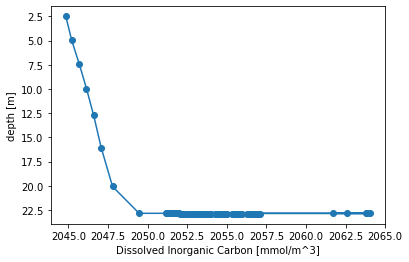

In [8]:
vert_plot(ds_085, "DIC", xh=xh, yh=yh)

### Daily comparisons

`082` was with `MIX_BOUNDARY_TRACER_ALE = False`, `083` uses `MIX_BOUNDARY_TRACER_ALE = True`.

For plots, color order is defined by [matplotlib](https://matplotlib.org/stable/_images/dflt_style_changes-1.png) as blue, orange, green, red, purple, brown, etc:

![We are using v2](https://matplotlib.org/stable/_images/dflt_style_changes-1.png)

In [9]:
casename = "C1850MOMECO.082"

ds_082 = []
for day in range(31):
    try:
        ds_082.append(get_dataset(casename, day=day+1))
    except:
        print(f"Had trouble opening file for day {day+1}")

In [10]:
casename = "C1850MOMECO.083"

ds_083 = []
for day in range(31):
    try:
        ds_083.append(get_dataset(casename, day=day+1))
    except:
        print(f"Had trouble opening file for day {day+1}")

In [11]:
xh = 79
yh = 323
# days = [0, 2, 4, 6, 8]
days = [0, 10, 20, 30]
# days = [0, 2, 4]

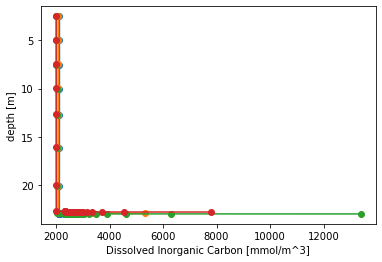

In [12]:
vert_plot([ds_082[i] for i in days], "DIC", xh, yh)

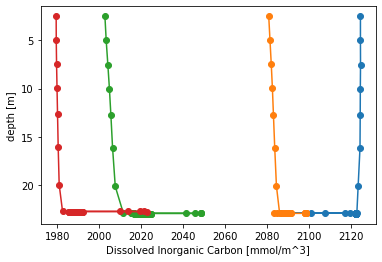

In [13]:
vert_plot([ds_083[i] for i in days], "DIC", xh, yh)

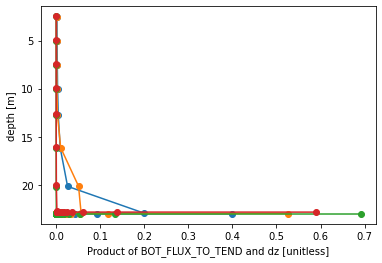

In [14]:
vert_plot([ds_082[i] for i in days], "bot_flux_times_dz", xh, yh)

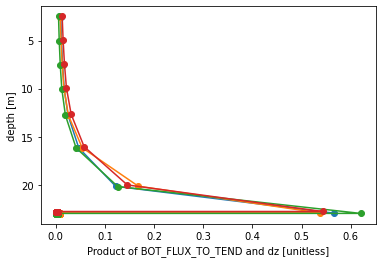

In [15]:
vert_plot([ds_083[i] for i in days], "bot_flux_times_dz", xh, yh)